# Movies Recommender 🍿 - Building a Recommendation System
A project proposal by **Adi Benziony (ID 313364549)**

## Introduction and Motivation
The film industry is a giant business, and every year thousands of new movies are made. In 2019 alone 4,693 new movies were released ([source](https://www.the-numbers.com/movies/production-countries#tab=year)).  
With all those new movies released each year it can be confusing to choose which movies to see, and that's where a personalized recommendation system can come in handy.

The growth in digital data volume that's at the disposal of big companies allowed a new era of personalized recommendation systems to arise.  
Every company serving consumers content wants to find a way to keep the consumer engaged and entertained, one of the ways this can be achived is by making it easier for the user to find content he will like.  
Companies like Spotify, Netflix, Twitter, Facebook and even dating apps such as Tinder all have recommendation systems to keep users on the platform.

![Netflix recommendations](resources/recommendations-banner.png)

In this notebook we will use [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) posted on Kaggle to build **a recommendation system for movies based on a user's ratings**.

## Dataset
This project is inspired by the dataset [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) posted on Kaggle, featuring movies information like title, genres, release date and more along with users' movies ratings.  
The dataset is a combination of [_MovieLens_](https://movielens.org/) and [_TMDB_](https://www.themoviedb.org/).  
MovieLens is a research site run by _GroupLens Research_ at the University of Minnesota and contains users' movies ratings, and _TMDB_ is a website containing data on millions of movies.

Our dataset cotains:
* **45,000 movies** in various languages (but mostly English) with properties like budget, revenue, genres, language, release date, duration, and ratings.
* **26 million ratings by 260,000 users**

## Dataset Loading & Cleanup
We will start by loading `movies-dataset/movies_metadata.csv`.  
Note, the original CSV uploaded to Kaggle had some lines with unescaped newlines in their movie description fields, the CSV in the project's Git repository is a fixed version of the CSV from Kaggle.

Let's load the dataset and start inspecting it:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_metadata = pd.read_csv('movies-dataset/movies_metadata.csv')
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45463 non-null  float64
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

We can see that the `release_date` field is not of type `datetime`, so let's change that:

In [3]:
movies_metadata = pd.read_csv('movies-dataset/movies_metadata.csv', parse_dates=['release_date'])

Let's also load the `credits.csv` and `keywords.csv` files

In [4]:
credits = pd.read_csv('movies-dataset/credits.csv')

In [5]:
keywords = pd.read_csv('movies-dataset/keywords.csv')

# Data Exploration

Now for some exploration, let's look at some rows of our datasets:

In [6]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


In [7]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [8]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


We can merge the 3 datasets into one, this will make it easier as we progress

In [9]:
movies = movies_metadata.merge(credits, on='id').merge(keywords, on='id')

We need to know who our recommendation system will cater to, this will depend on how much our dataset is skwed.  
So let's look at some basic statistics of language, budget, revenu, release dates, duration, votes count and genres.

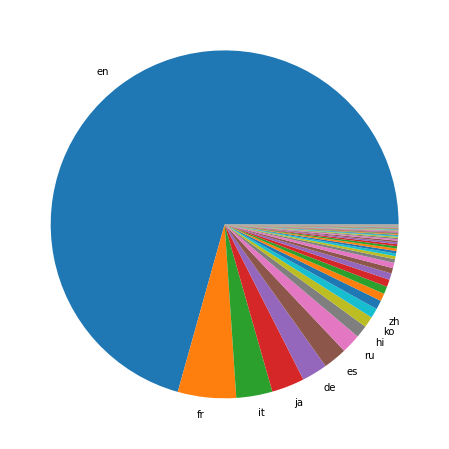

In [10]:
lng_counts = movies['original_language'].value_counts()

top_lng = lng_counts.index.tolist()[:10]
labels = top_lng + [""]*(lng_counts.index.size - 10)
plt.figure(figsize=(8, 8))
plt.pie(lng_counts, labels=labels)

plt.show()

English is the most dominent language in our dataset, while there's also French, Italian, Japanease, German, Spanish, Russian and more.

Let's look at statistics about the release dates and the duration:  

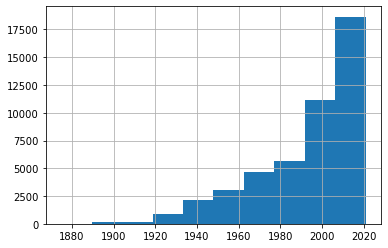

In [11]:
movies['release_date'].hist()
plt.show()

We can see that our dataset is comprised mainly from movies made in recent years, this doesn't necessarily mean that our data is skwed, maybe there really were more movies made in recent years than before.

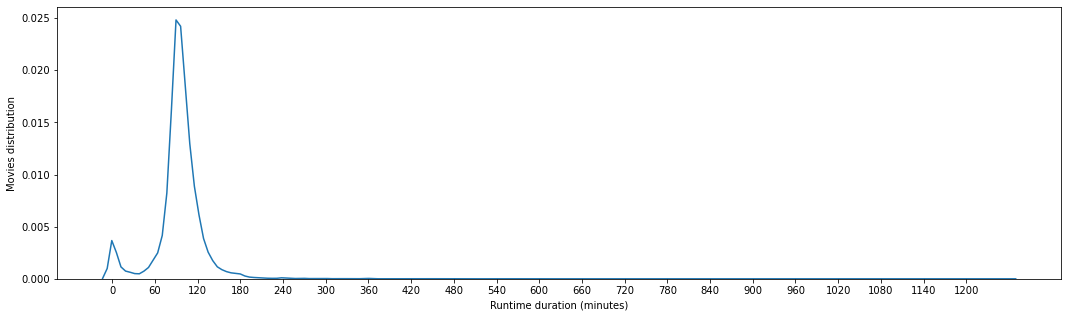

In [12]:
plt.figure(figsize=(18,5))
runtimes = movies['runtime']
sns.kdeplot(runtimes)
plt.xticks(np.arange(min(runtimes), max(runtimes), 60))  # Show ticks every hour
plt.xlabel("Runtime duration (minutes)")
plt.ylabel("Movies distribution")
plt.show()

The average duration is a little more than an hour and a half, and most movies are between an hour and 2 hours.

Next, let's take a look at the different genres.  
In order to do that we will need to make the genres data usable. Currently the genres of each movie is stored as follows:

In [13]:
movies[movies['title'] == 'Toy Story'][['title', 'genres']]

,title,genres
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."


We'll convert the `genres` field to a simple list of values, and we'll do the same for `cast`, `crew`, and `keywords`

In [14]:
movies["genres"] = movies["genres"].apply(lambda value: [x["name"] for x in eval(value)])
movies["cast"] = movies["cast"].apply(lambda value: [x["name"] for x in eval(value)])
movies["crew"] = movies["crew"].apply(lambda value: [x["name"] for x in eval(value)])
movies["keywords"] = movies["keywords"].apply(lambda value: [x["name"] for x in eval(value)])

To make it simpler to plot different aspects of movies' geners, we'll create a new `DataFrame` that will have a duplicate of each movie per its genre:

In [15]:
movies_genres = movies.explode('genres').rename(columns={'genres': 'genre'})

For example, for the movie "Toy Story" the `movies_genres` `DataFrame` will store the genres as follows:

In [16]:
movies_genres[movies_genres['title'] == 'Toy Story'][['title', 'genre']]

,title,genre
0,Toy Story,Animation
0,Toy Story,Comedy
0,Toy Story,Family


We have the following genres:

In [17]:
genres = movies_genres['genre'].unique()
pd.DataFrame(genres)

,0
0,Animation
1,Comedy
2,Family
3,Adventure
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


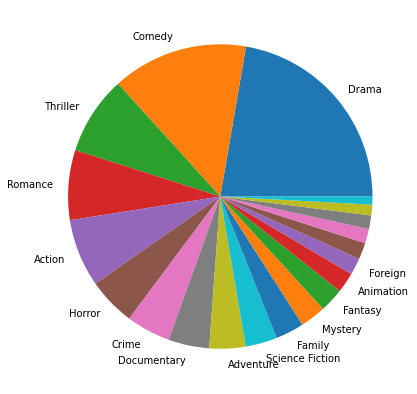

In [18]:
genres_count = movies_genres['genre'].value_counts()
top_genres = genres_count.index.tolist()[:15]
labels = top_genres + [""]*(genres_count.index.size - 15)
plt.figure(figsize=(7, 7))
a = plt.pie(genres_count, labels=labels)

It's clear that most movies produced are categorized as "Drama", "Comedy", "Thriller", "Romance", or "Action".

It will be interesting to see how different movie properties change based on genre. We'll keep it in mind going forward in this notebook.

Next, let's take a look at movies' votes

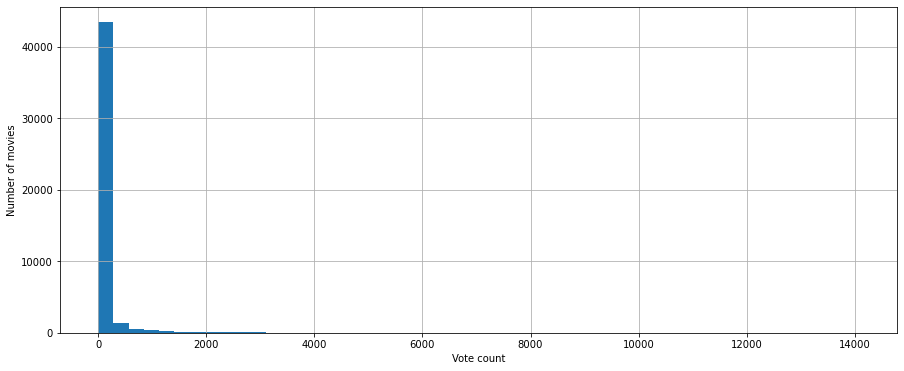

In [19]:
plt.figure(figsize=(15, 6))
movies['vote_count'].hist(bins=50)
plt.xlabel("Vote count")
plt.ylabel("Number of movies")
plt.show()

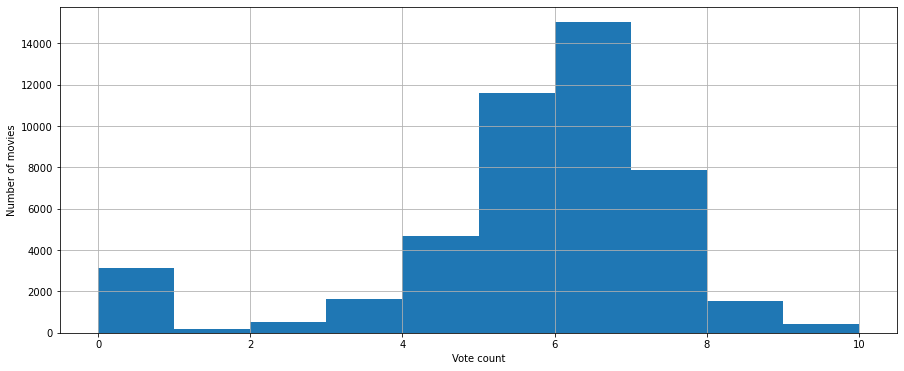

In [20]:
plt.figure(figsize=(15, 6))
movies['vote_average'].hist()
plt.xlabel("Vote count")
plt.ylabel("Number of movies")
plt.show()

## Finding Correlations

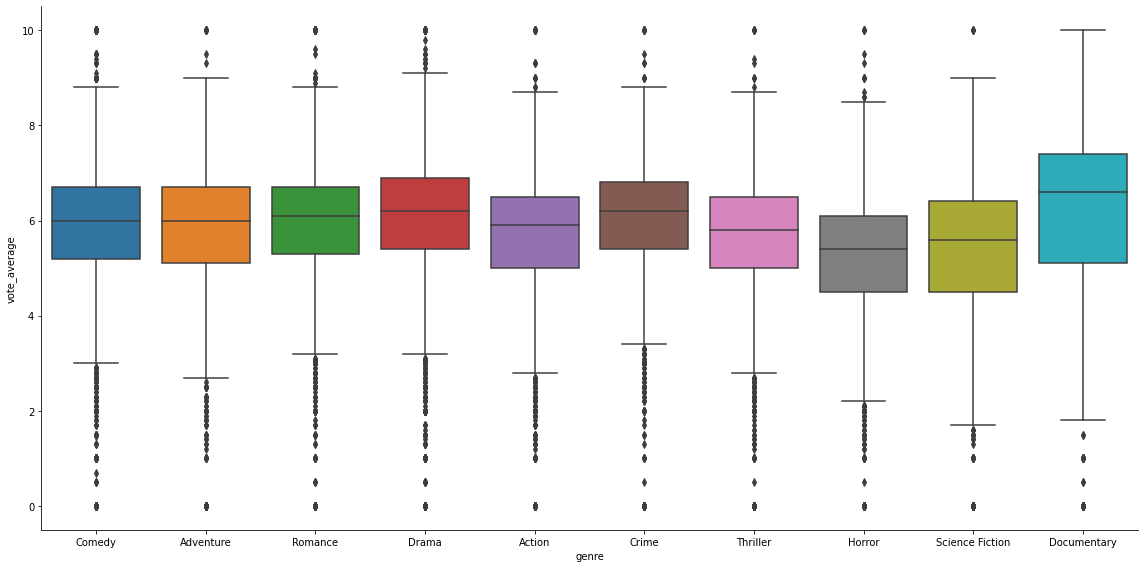

In [21]:
movies_in_top_genres = movies_genres[movies_genres['genre'].isin(top_genres[:10])]
sns.catplot(x="genre", y="vote_average", data=movies_in_top_genres, kind='box', height=8, aspect=2)
plt.show()

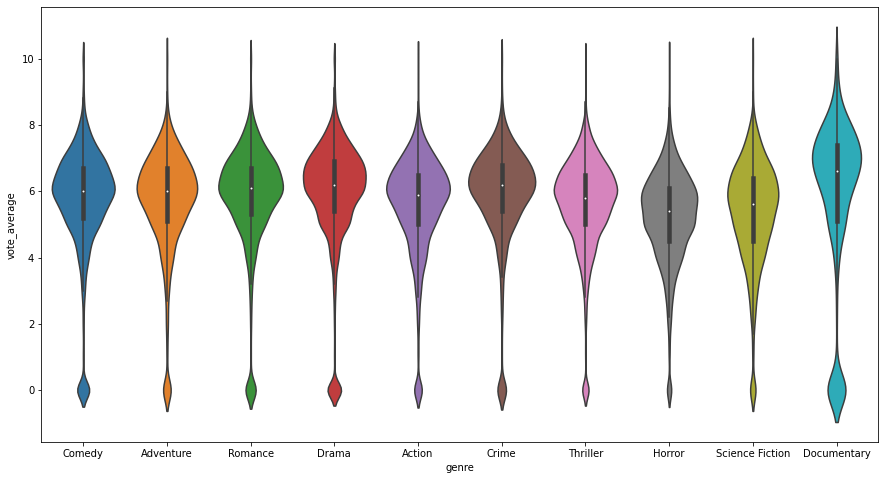

In [22]:
plt.figure(figsize=(15,8))
sns.violinplot(x="genre", y="vote_average", data=movies_in_top_genres)
plt.show()

In [23]:
# ratings = pd.read_csv('movies-dataset/ratings.csv')
# links = pd.read_csv('movies-dataset/links.csv')
# ratings = ratings.merge(links, on='movieId')
# ratings = ratings.dropna()
# ratings['tmdbId'] = ratings['tmdbId'].astype(int)

In [24]:
# ratings.head()

In [25]:
# top_movies = movies_metadata.nlargest(10, 'revenue')

In [26]:
# top_movies_ratings = top_movies.merge(ratings, left_on='id', right_on='tmdbId')

In [27]:
# sns.catplot(x='title', y='rating', data=top_movies_ratings, kind='violin', height=5, aspect=4)

In [28]:
# rating_stds = ratings.groupby('tmdbId')['rating'].std().dropna()
# a=rating_stds.reset_index(name='tmdbId')
# # a.index.name = 'tmdbId'
# a
# # controversial_movies = rating_stds.nlargest(10)

In [29]:
# rating_stds.nlargest(10, columns=['rating'])['tmdbId']

In [30]:
# movies_metadata[movies_metadata['id'].isin(controversial_movies['tmdbId'])]

In [31]:
# ratings.groupby('userId')['movieId'].count().value_counts().hist()

In [32]:
# ratings_count = ratings.groupby('userId')['movieId'].count()
# print(f'{ratings.shape[0]:,} ratings')
# print(f'{ratings["userId"].unique().size:,} users')


# for i in [25, 50, 100, 200]:
#     users_with_r = ratings_count[ratings_count >= i]
#     print(f'{users_with_r.shape[0]:,} users with over {i} votes')


# Building a Recommendation System

## Recommendation Systems Types

A recommendation system is a type of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.  
There are 2 common types of recommendations systems _content based_ and _collaborative based_.

A __content based__ recommendations system uses the description of items and the user's past to recommend items the user might like. Those kind of systems rely on a well tagged dataset of items and the user's preferences

A __collaborative based__ recommendations system doesn't use data on the items at all, rather relying on finding similar interests between different users.  
This is based on the assumption that people who agreed in the past will agree in the future, and that they will like simimlar kinds of items as they liked in the past.The importance of analyzing users' preferences is key, with data collection being collected explicitly (likes, dislikes, ratings) and implicitly (viewing times).

Most recommendations systems feature a hybrid approch of those two methods.

I want to look at the problem from a number of different point of views, so I'll try to create multiple recommendation systems that each function in a different way, and in the end combine all of them.

## First Try - A Content Based Recommendation System

For a content based recommendation system, we need to find similarities between movies.
This is our plan:
1. Create a function that accepts a movie title and grades all movies based on a similarity score
2. Create a function that accepts a user ID, and grades all movies based on a similarity score to all the movies that user watched
3. Modify 2 to take into account the rating the user gave for each movie in his movie history, this way we won't recommend movies similar to the movies the user didn't like

### Building the corpus
Looking at our dataset, there are a couple of columns that can be very useful in finding similarities between movies:

We will use text based 

In [39]:
movies[["title", "original_language", "genres", "keywords", "cast", "crew"]].head()

,title,original_language,genres,keywords,cast,crew
0,Toy Story,en,"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J..."
1,Jumanji,en,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho..."
2,Grumpier Old Men,en,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev..."
3,Waiting to Exhale,en,"[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez..."
4,Father of the Bride Part II,en,[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N..."


In [ ]:
movies = movies[:500]  # We have to work with a smaller dataset, since I don't have enough resources for more than that

In [34]:
corpus = []
# TODO: Strip spaces from individual text objects
for _, m in movies.fillna({"original_language": ""}).iterrows():
    corpus.append(m["original_language"] + " " + " ".join(m["genres"]) + " " + " ".join(m["keywords"]) + " " + " ".join(m["cast"]) + " ".join(m["crew"]))

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TODO: Use CountVectorizer instead of Tfidf, since the amount of times a word appears in the entire corpus doesn't matter at all
transformer = TfidfVectorizer(stop_words="english")
dt_matrix = transformer.fit_transform(corpus)

In [36]:
from sklearn.decomposition import TruncatedSVD

# decomp = TruncatedSVD(n_components=1000)
# X = decomp.fit_transform(dt_matrix)

In [37]:
from sklearn.metrics.pairwise import linear_kernel

sim = linear_kernel(dt_matrix, dt_matrix)

In [38]:
ind = movies[movies["title"] == 'Pulp Fiction'].index

m_sim = sim[ind][0]

top_sims = m_sim.argsort()[-11:-1]
top_sims = np.flip(top_sims)

similar_movies = movies.iloc[top_sims]
similar_movies[["id", "title", "genres", "keywords", "cast", "crew"]]
# for index, top_sim in enumerate(top_sims):
#     print(f'{index + 1}. {movies.iloc[top_sim]["title"]} [{top_sim}] with {m_sim[top_sim]:.3}')

,id,title,genres,keywords,cast,crew
17,5,Four Rooms,"[Crime, Comedy]","[hotel, new year's eve, witch, bet, hotel room...","[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Combustible Edison, Gary Frutkoff, Lance Brow..."
69,755,From Dusk Till Dawn,"[Horror, Action, Thriller, Crime]","[dancing, brother brother relationship, sexual...","[George Clooney, Quentin Tarantino, Harvey Kei...","[Robert Rodriguez, Quentin Tarantino, Quentin ..."
20,8012,Get Shorty,"[Comedy, Thriller, Crime]","[gambling, miami, based on novel, job, murder,...","[John Travolta, Gene Hackman, Rene Russo, Dann...","[Barry Sonnenfeld, Elmore Leonard, Danny DeVit..."
147,568,Apollo 13,[Drama],"[moon, florida, nasa, spaceman, race against t...","[Tom Hanks, Bill Paxton, Kevin Bacon, Gary Sin...","[William Broyles Jr., Brian Grazer, Brian Graz..."
162,1572,Die Hard: With a Vengeance,"[Action, Thriller]","[bomb, taxi, riddle, robbery, detective, helic...","[Bruce Willis, Jeremy Irons, Samuel L. Jackson...","[Mark A. Mangini, Jonathan Hensleigh, John McT..."
156,20649,Clockers,"[Mystery, Crime, Drama]","[drug pusher, train, drug, drug lord]","[Harvey Keitel, John Turturro, Delroy Lindo, M...","[Spike Lee, Spike Lee, Richard Price]"
73,20927,Bed of Roses,"[Drama, Romance]","[florist, family relationships]","[Christian Slater, Mary Stuart Masterson, Pame...","[Michael Goldenberg, Michael Goldenberg, Micha..."
475,329,Jurassic Park,"[Adventure, Science Fiction]","[exotic island, dna, paleontology, tyrannosaur...","[Sam Neill, Laura Dern, Jeff Goldblum, Richard...","[Steven Spielberg, Kathleen Kennedy, Gerald R...."
477,507,Killing Zoe,"[Action, Crime, Drama, Thriller]","[paris, prostitute, robbery, drug abuse, aids,...","[Eric Stoltz, Julie Delpy, Jean-Hugues Anglade...","[Quentin Tarantino, David Wasco, Roger Avary, ..."
49,629,The Usual Suspects,"[Drama, Crime, Thriller]","[law, relatives, theft, criminal, criminal mas...","[Stephen Baldwin, Gabriel Byrne, Chazz Palmint...","[Bryan Singer, Bryan Singer, Michael McDonnell..."
